In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# view all columns in the dataframe 
pd.set_option('display.max_columns', None)

In [2]:
# load the dataset 
vga = pd.read_csv(r'C:\Users\OJO Timilehin\Desktop\dataset/vgsales.csv')

In [3]:
vga.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# shape 
vga.shape

(16598, 11)

In [5]:
# null values 
vga.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# feature with NaN values
feature_NaN = [feature for feature in vga.columns if vga[feature].isnull().sum()>1] 
print('feature with NaN values: ',feature_NaN)
# sum and percentage of NaN values 
for feature in feature_NaN: 
    print(feature, ':', vga[feature].isnull().sum(), ', ', round(vga[feature].isnull().mean(), 3), '% missing NaN values' )

feature with NaN values:  ['Year', 'Publisher']
Year : 271 ,  0.016 % missing NaN values
Publisher : 58 ,  0.003 % missing NaN values


In [7]:
# fill NaN values
vga['Publisher'] = vga['Publisher'].fillna('Missing') 
vga['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Missing', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Ent

In [8]:
# dtypes 
vga.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
# categorical values
cat_feat = [feature for feature in vga.columns if vga[feature].dtypes == 'O']

# value counts of categorical feature unique values 
for feature in cat_feat: 
    df=vga.copy()
    val_count = df[feature].value_counts()
    print(val_count)

Need for Speed: Most Wanted         12
Ratatouille                          9
Madden NFL 07                        9
FIFA 14                              9
LEGO Marvel Super Heroes             9
                                    ..
Men of War: Vietnam                  1
San Goku Shi DS 2                    1
Forza Motorsport 5                   1
Diablo II                            1
Scarface: Money. Power. Respect.     1
Name: Name, Length: 11493, dtype: int64
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter        

### Three out of the Four Categorical features have high cardinality

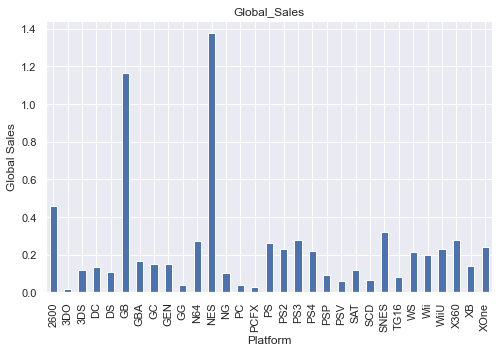

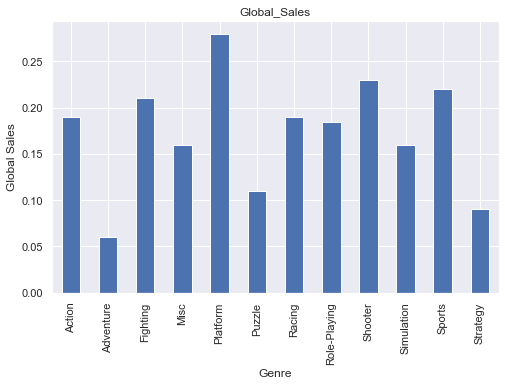

In [10]:
# categorical features
cat_feat_low_cardinality = [feature for feature in vga.columns if vga[feature].dtypes == 'O' and feature not in ['Name', 'Publisher']]  

# plot the relationship betweeen categorical features and Global sales 
for feature in cat_feat_low_cardinality: 
    df=vga.copy()
    plt.figure(figsize=(8, 5))
    df.groupby(feature)['Global_Sales'].median().plot.bar()
    plt.ylabel('Global Sales')
    plt.title('Global_Sales')
    plt.show()

### Numerical Variables 

In [11]:
# numerical features 
num_feat = [feature for feature in vga.columns if vga[feature].dtypes != 'O' 
            and feature not in ['Rank','Year']]
num_feat

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

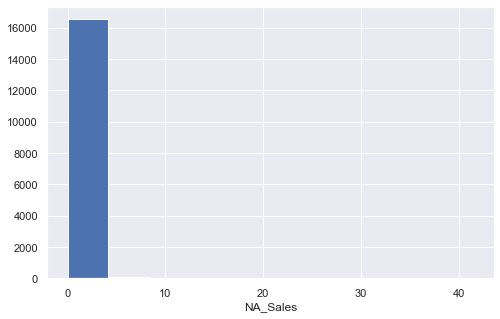

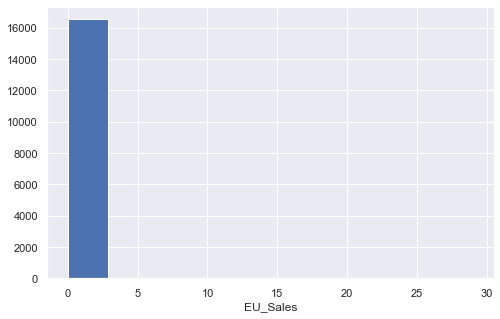

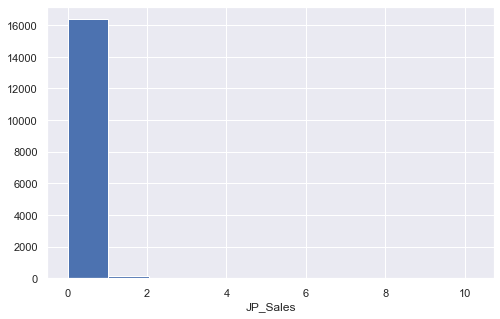

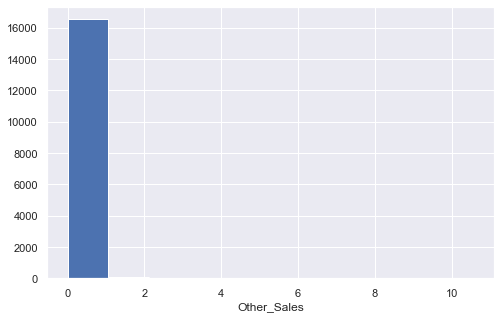

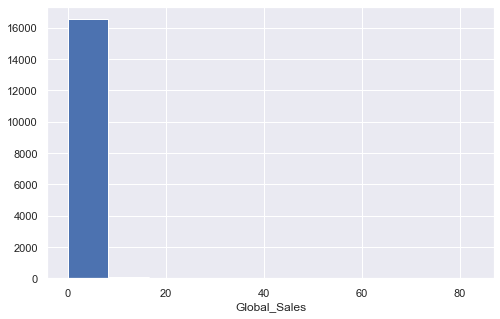

In [12]:
# histogram distribution of numerical features 
for feature in num_feat: 
    # copy the dataframe 
    plt.figure(figsize=(8, 5))
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.show()

### All the Numerical variables does not follow a normal/Gaussian distribution. So we will perform a logarithm transformation.

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


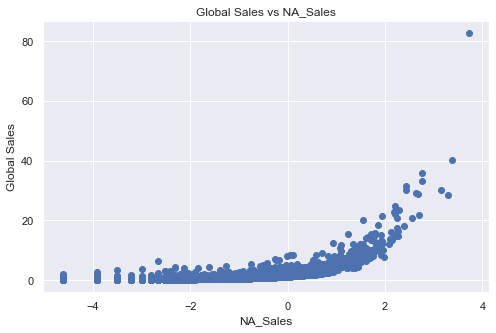

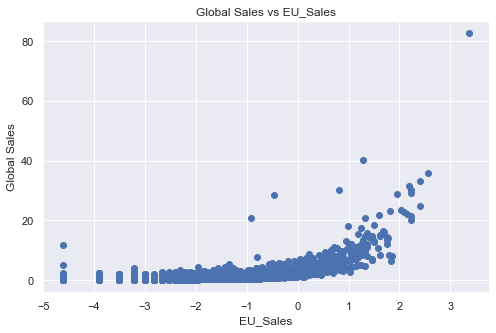

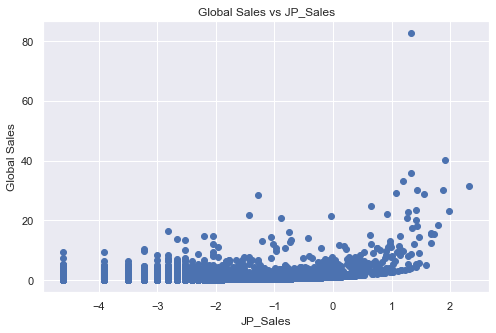

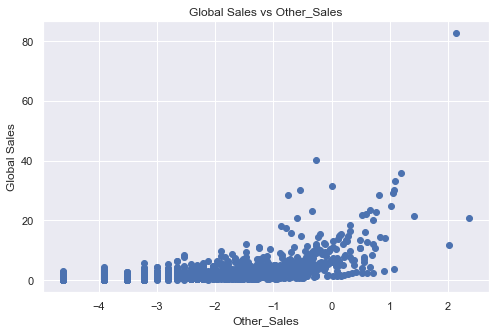

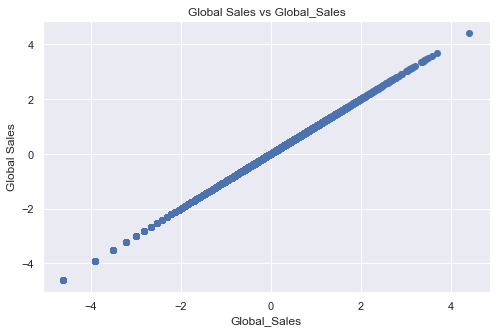

In [13]:
# logarithm transformation 
for feature in num_feat: 
    # copy the dataframe 
    df = vga.copy()
    df[feature] = np.log(df[feature])
    # plot the scatter plot with the target variable 
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['Global_Sales'])
    plt.title('Global Sales vs '+feature) 
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.show()

### Outliers

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


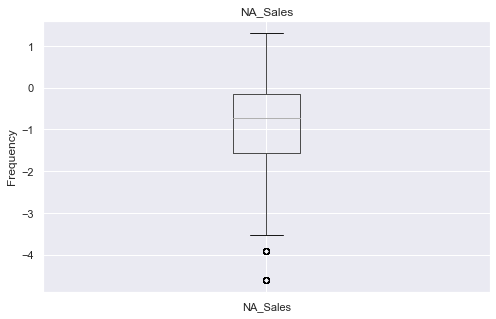

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


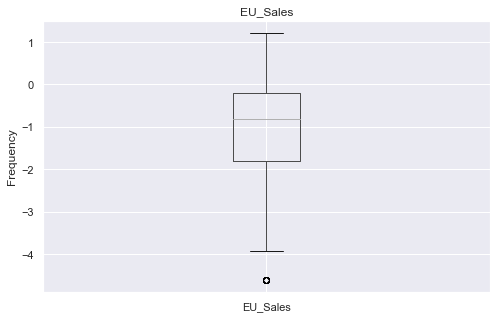

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


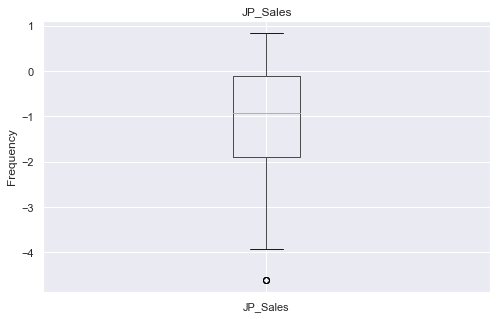

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


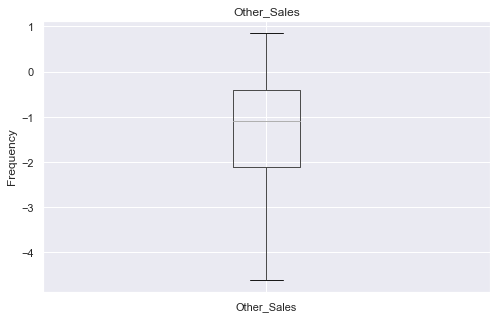

C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OJO Timilehin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


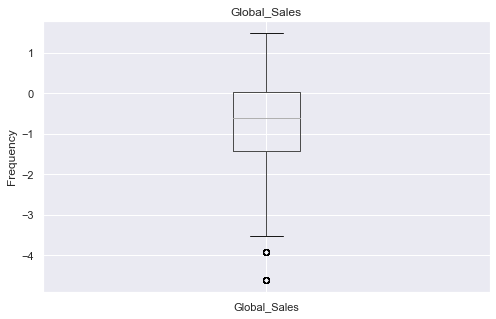

In [14]:
# outliers  
for feature in num_feat: 
    # copy the dataframe 
    df = vga.copy()
    df[feature] = np.log(df[feature])
    # plot the scatter plot with the target variable 
    plt.figure(figsize=(8, 5)) 
    df[feature] = np.log(df[feature])
    df.boxplot(feature)
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()

### Temporal Variables 

In [15]:
temp_feat = [feature for feature in vga.columns if feature == 'Year']
temp_feat

['Year']

In [16]:
# Number of unique values
vga['Year'].nunique()

39

Text(0.5, 1.0, 'Total Sales by Year')

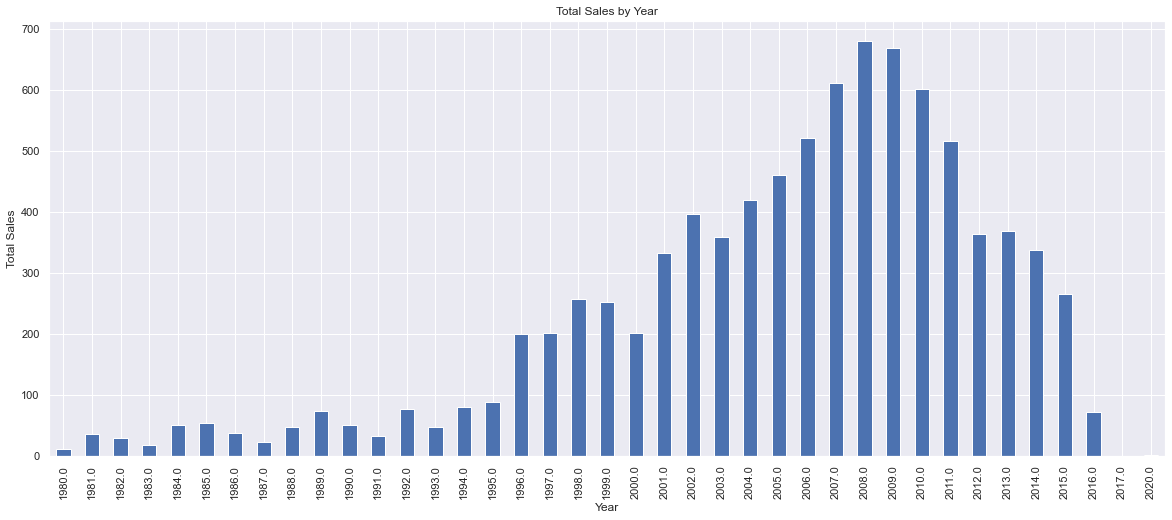

In [17]:
# sum of sales by year
tot_sales_by_year = vga.groupby('Year')['Global_Sales'].sum()

# plot the bar chart
plt.figure(figsize = (20, 8))
tot_sales_by_year.plot.bar() 
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

## Feature Engineering 

### Categorical Values with High cardinality

In [18]:
vga.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
for feature in ['Platform', 'Genre', 'Publisher']: 
    print(feature, 'has ', vga[feature].nunique(), ' unique values')

Platform has  31  unique values
Genre has  12  unique values
Publisher has  579  unique values


In [20]:
# replace Categorical unique values less than 1% with Rare Value
for feature in ['Platform', 'Genre', 'Publisher']: 
    gsg = vga.groupby(feature)[feature].count()/len(vga)
    temp_df = gsg[gsg > 0.01].index
    # replace 
    vga[feature] = np.where(vga[feature].isin(temp_df), vga[feature], 'Rare Value')

In [21]:
for feature in ['Platform', 'Genre', 'Publisher']: 
    print(feature, ' now have ', vga[feature].nunique(), ' unique values')

Platform  now have  19  unique values
Genre  now have  12  unique values
Publisher  now have  24  unique values


### The High Cardinal Categorical variables now have a reduce number of unique values

In [22]:
# map the categorical unique variables with their value counts
for feature in ['Platform', 'Genre', 'Publisher']: 
    map_dict = df[feature].value_counts().to_dict() 
    vga[feature] = df[feature].map(map_dict)

### I replaced the categorical unique variables with thgeir respective unique value counts

In [23]:
vga.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,1325,2006.0,2346,703,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,98,1985.0,886,703,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,1325,2008.0,1249,703,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,1325,2009.0,2346,703,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,98,1996.0,1488,703,11.27,8.89,10.22,1.00,31.37


### Logarithm transformation of the Numerical Sales Variables

In [24]:
# variables with sales in the name 
sales_var = [feature for feature in vga.columns if 'Sales' in feature and feature != 'Global_Sales']

In [25]:
vga.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,1325,2006.0,2346,703,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,98,1985.0,886,703,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,1325,2008.0,1249,703,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,1325,2009.0,2346,703,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,98,1996.0,1488,703,11.27,8.89,10.22,1.00,31.37


In [26]:
# drop the Rank column 
vga.drop('Rank', axis = 1, inplace=True)

In [27]:
vga.Name.nunique()

11493

In [28]:
vga[['NA_Sales', 'EU_Sales']].sum(axis=1)

0        70.51
1        32.66
2        28.73
3        26.76
4        20.16
         ...  
16593     0.01
16594     0.01
16595     0.00
16596     0.01
16597     0.01
Length: 16598, dtype: float64

In [29]:
vga.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,Woody Woodpecker in Crazy Castle 5,822,2002.0,886,21,0.01,0.00,0.0,0.0,0.01
16594,Men in Black II: Alien Escape,556,2003.0,1310,62,0.01,0.00,0.0,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,2161,2008.0,1249,975,0.00,0.00,0.0,0.0,0.01
16596,Know How 2,2163,2010.0,582,4,0.00,0.01,0.0,0.0,0.01
16597,Spirits & Spells,822,2003.0,886,5,0.01,0.00,0.0,0.0,0.01


In [30]:
vga.dtypes

Name             object
Platform          int64
Year            float64
Genre             int64
Publisher         int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [31]:
vga.drop('Name', axis=1, inplace = True)

## Split the data into Training and Test data

In [32]:
# predictor and response features 
X = vga.drop('Global_Sales', axis = 1)
y = vga['Global_Sales']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11618, 8) (4980, 8) (11618,) (4980,)


In [36]:
X_train.isnull().sum()

Platform         0
Year           201
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [37]:
X_train['Year'] = X_train['Year'].fillna(2020.0)

<ipython-input-37-d56246895832>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Year'] = X_train['Year'].fillna(2020.0)


In [38]:
X_train['Year'].unique()

array([2002., 2009., 1996., 2005., 2001., 2011., 2008., 2012., 2007.,
       2006., 2003., 2010., 2014., 2013., 2015., 1982., 2000., 2004.,
       1997., 1998., 1995., 2020., 2016., 1983., 1999., 1994., 1990.,
       1991., 1988., 1993., 1992., 1986., 1989., 1981., 1987., 1984.,
       2017., 1985., 1980.])

In [39]:
X_test['Year'] = X_test['Year'].fillna(2017.0)

<ipython-input-39-ca92c88fbdc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Year'] = X_test['Year'].fillna(2017.0)


In [40]:
X_test['Year'].unique()

array([2012., 2007., 2003., 2009., 2001., 2011., 1999., 2005., 1996.,
       2017., 2002., 1998., 2015., 2006., 2013., 2008., 1993., 2004.,
       1994., 1997., 2000., 2010., 2014., 1983., 1995., 1982., 1981.,
       2016., 1991., 1990., 1980., 1985., 1988., 1987., 1986., 1992.,
       1989., 2020., 1984.])

In [41]:
X_test.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [42]:
X_train.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8715,822,2002.0,2346,975,0.11,0.04,0.0,0.00
9463,1325,2009.0,2346,921,0.10,0.02,0.0,0.01
1432,2161,2002.0,1310,1351,0.67,0.52,0.0,0.17
12240,1196,1996.0,1249,18,0.04,0.02,0.0,0.00
7613,824,2005.0,3316,218,0.15,0.04,0.0,0.01


## Standardisation 

In [81]:
# import standardscaler
from sklearn.preprocessing import StandardScaler 

sts = StandardScaler() 

X_train = sts.fit_transform(X_train)

In [82]:
X_train

array([[-0.66653524, -0.76364884,  0.62072678, ..., -0.22832277,
        -0.24816779, -0.2664561 ],
       [ 0.11658348,  0.38846146,  0.62072678, ..., -0.27271531,
        -0.24816779, -0.21039005],
       [ 1.41814859, -0.76364884, -0.52955976, ...,  0.83709815,
        -0.24816779,  0.68666676],
       ...,
       [ 0.11658348,  0.71763583,  1.69773252, ...,  0.06022873,
        -0.24816779, -0.0421919 ],
       [ 1.41814859, -0.76364884, -1.0003334 , ...,  1.79153772,
        -0.24816779,  1.30339332],
       [-0.45168358, -0.1053001 , -1.02142939, ..., -0.29491158,
        -0.24816779, -0.2664561 ]])

In [83]:
X_test = sts.transform(X_test) 
X_test

array([[-0.45168358,  0.88222302, -0.59728898, ..., -0.07294888,
        -0.24816779, -0.09825795],
       [ 0.12281106,  0.05928709,  1.69773252, ..., -0.22832277,
        -0.21653939, -0.0421919 ],
       [-0.45168358, -0.59906166, -1.22794801, ..., -0.27271531,
        -0.24816779, -0.2664561 ],
       ...,
       [ 0.12281106,  0.71763583,  1.69773252, ...,  0.57074292,
        -0.24816779,  0.63060071],
       [ 1.41814859, -0.43447447,  0.62072678, ..., -0.27271531,
        -0.24816779, -0.21039005],
       [ 0.11658348,  0.71763583, -0.05323454, ...,  0.082425  ,
        -0.24816779, -0.0421919 ]])

## Modelling 


### Linear Regression

In [84]:
# linear regression 
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 

# training 
X_train_lrr = lr.fit(X_train, y_train)

In [85]:
# intercept 
intercept = lr.intercept_
intercept

0.5306248924083319

In [86]:
# slope 
slope = lr.coef_
slope

array([ 6.03518777e-06, -5.10724715e-07, -1.09617858e-05, -7.94181026e-05,
        7.73604162e-01,  4.50499054e-01,  3.16190555e-01,  1.78226884e-01])

In [55]:
feature_names = X.columns
feature_names

Index(['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales'],
      dtype='object')

In [87]:
y_pred =lr.predict(X_test)

In [88]:
y_pred

array([0.15042135, 0.41021837, 0.02044933, ..., 0.95009951, 0.0604476 ,
       0.22039856])

In [89]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred})
results

,Actual Value,Predicted Value
8928,0.15,0.150421
4789,0.40,0.410218
15492,0.02,0.020449
14767,0.03,0.020233
5211,0.36,0.360235
...,...,...
8817,0.15,0.150357
10333,0.11,0.110288
2186,0.95,0.950100
12313,0.06,0.060448


# Model Evaluation

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)

In [72]:
print(f'Mean absolute error: {mae: 2f}')
print(f'Mean squared error: {mse: 2f}')
print(f'Root Mean squared error: {rmse: 2f}')

Mean absolute error:  0.002931
Mean squared error:  0.000027
Root Mean squared error:  0.005188


In [90]:
lr.score(X_test, y_test)

0.9999916067674102

In [91]:
lr.score(X_train, y_train)

0.9999868133955874

### Lasso Regression 


### Modelling

In [62]:
from sklearn.linear_model import Lasso

In [121]:
las = Lasso(alpha = 0.01)

In [122]:
X_train_las = las.fit(X_train, y_train)

In [123]:
y_pred_las = las.predict(X_test) 
y_pred_las

array([0.15354851, 0.41205145, 0.02483422, ..., 0.94700791, 0.06438476,
       0.22306712])

In [124]:
results = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred_las})
results

,Actual Value,Predicted Value
8928,0.15,0.153549
4789,0.40,0.412051
15492,0.02,0.024834
14767,0.03,0.024823
5211,0.36,0.362178
...,...,...
8817,0.15,0.151629
10333,0.11,0.114214
2186,0.95,0.947008
12313,0.06,0.064385


### Model Evaluation

In [126]:
mae = mean_absolute_error(y_test, y_pred_las) 
mse = mean_squared_error(y_test, y_pred_las) 
rmse = np.sqrt(mse)

In [133]:
print(f'Mean absolute error: {mae: 2f}')
print(f'Mean squared error: {mse: 2f}')
print(f'Root Mean squared error: {rmse: 2f}')

Mean absolute error:  0.006901
Mean squared error:  0.000243
Root Mean squared error:  0.015598


In [128]:
# R-square score
las.score(X_test, y_test)

0.9999241281606328

In [129]:
# R-Square score 
las.score(X_train, y_train)

0.9999079214260609